In [1]:
import pandas as pd
df = pd.read_csv("data/jobs.csv")
df.head()


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [2]:
df.shape


(2253, 16)

In [3]:
df.columns


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [4]:
'Unnamed: 0'


'Unnamed: 0'

In [5]:
df = df.drop(columns=['Unnamed: 0'])
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [6]:
df['Salary Estimate'].head(10)


0    $37K-$66K (Glassdoor est.)
1    $37K-$66K (Glassdoor est.)
2    $37K-$66K (Glassdoor est.)
3    $37K-$66K (Glassdoor est.)
4    $37K-$66K (Glassdoor est.)
5    $37K-$66K (Glassdoor est.)
6    $37K-$66K (Glassdoor est.)
7    $37K-$66K (Glassdoor est.)
8    $37K-$66K (Glassdoor est.)
9    $37K-$66K (Glassdoor est.)
Name: Salary Estimate, dtype: object

In [7]:
df = df[df['Salary Estimate'] != '-1']


In [8]:
df['Salary'] = df['Salary Estimate'].str.replace('$','').str.replace('K','').str.replace('(Glassdoor est.)','')


In [9]:
df[['Salary Estimate','Salary']].head()


,Salary Estimate,Salary
0,$37K-$66K (Glassdoor est.),37-66
1,$37K-$66K (Glassdoor est.),37-66
2,$37K-$66K (Glassdoor est.),37-66
3,$37K-$66K (Glassdoor est.),37-66
4,$37K-$66K (Glassdoor est.),37-66


In [10]:
df['Min Salary'] = df['Salary'].apply(lambda x: int(x.split('-')[0]))
df['Max Salary'] = df['Salary'].apply(lambda x: int(x.split('-')[1]))
df['Avg Salary'] = (df['Min Salary'] + df['Max Salary']) / 2


In [11]:
df[['Salary','Min Salary','Max Salary','Avg Salary']].head()


,Salary,Min Salary,Max Salary,Avg Salary
0,37-66,37,66,51.5
1,37-66,37,66,51.5
2,37-66,37,66,51.5
3,37-66,37,66,51.5
4,37-66,37,66,51.5


In [12]:
df['Location'].value_counts().head(10)


Location
New York, NY         310
Chicago, IL          130
San Francisco, CA    119
Austin, TX            81
Los Angeles, CA       80
Charlotte, NC         78
Houston, TX           72
Dallas, TX            66
San Diego, CA         62
Philadelphia, PA      56
Name: count, dtype: int64

<Axes: xlabel='Location'>

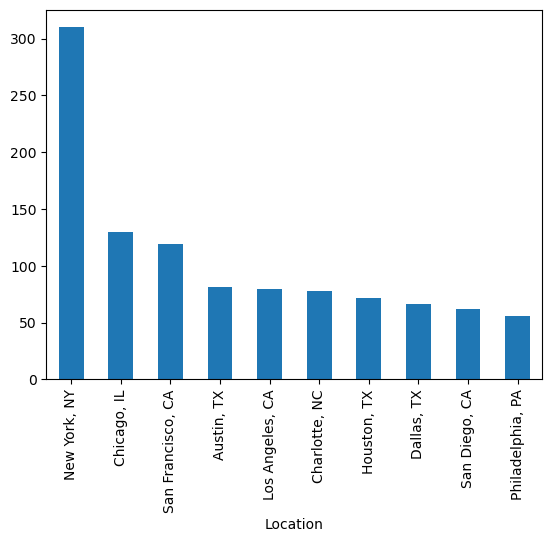

In [13]:
df['Location'].value_counts().head(10).plot(kind='bar')


In [14]:
df['Job Title'].value_counts().head(10)


Job Title
Data Analyst               405
Senior Data Analyst         90
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            21
Data Quality Analyst        17
Data Analyst Junior         17
Data Analyst II             17
Data Governance Analyst     16
Lead Data Analyst           15
Name: count, dtype: int64

In [15]:
skills = ['python','sql','excel','power bi','tableau','machine learning','statistics']

skill_count = {}

for skill in skills:
    skill_count[skill] = df['Job Description'].str.lower().str.contains(skill).sum()

skill_count


{'python': np.int64(637),
 'sql': np.int64(1388),
 'excel': np.int64(1353),
 'power bi': np.int64(180),
 'tableau': np.int64(620),
 'machine learning': np.int64(180),
 'statistics': np.int64(563)}

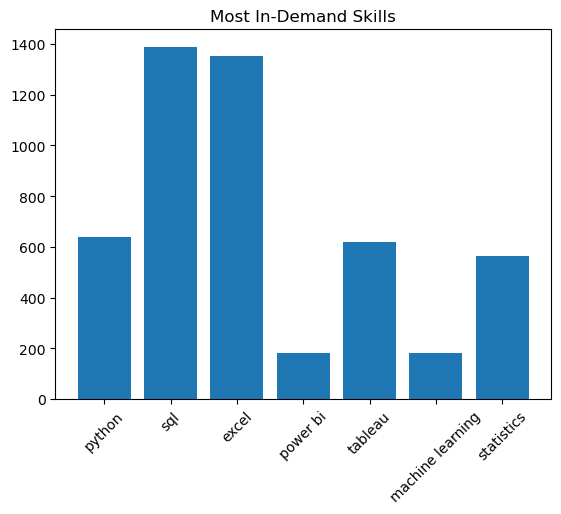

In [16]:
import matplotlib.pyplot as plt

plt.bar(skill_count.keys(), skill_count.values())
plt.xticks(rotation=45)
plt.title("Most In-Demand Skills")
plt.show()


In [17]:
df.to_csv("data/cleaned_jobs.csv", index=False)


In [18]:
df.to_csv("cleaned_jobs.csv", index=False)


In [19]:
df.to_csv(r"C:\Users\pranu\Desktop\cleaned_jobs.csv", index=False)


OSError: Cannot save file into a non-existent directory: 'C:\Users\pranu\Desktop'

In [1]:
import os
os.path.expanduser("~")

'C:\\Users\\pranu'

In [2]:
df.to_csv(r"C:\Users\pranu\Downloads\archive\Job_market_Analysis_proj\cleaned_jobs.csv", index=False)


NameError: name 'df' is not defined

In [3]:
import pandas as pd
df = pd.read_csv("cleaned_jobs.csv")


In [4]:
df.to_csv(r"C:\Users\pranu\Downloads\archive\Job_market_Analysis_proj\cleaned_jobs.csv", index=False)


In [5]:
df.to_excel("cleaned_jobs.xlsx", index=False)
